In [ ]:
import pandas as pd  # pandas helps us handle tables

# Load the CSV file from the uploaded location
df = pd.read_csv('/content/amazon_sales.csv')

# Show the first 5 rows of the dataset
df.head()


,Order_ID,Product,Category,Price,Quantity
0,1,Monitor,NaN,212.0,3.0
1,2,Keyboard,Electronics,101.0,9.0
2,3,Tablet,Accessories,741.0,3.0
3,4,Keyboard,NaN,319.0,NaN
4,5,Keyboard,Gadgets,665.0,2.0


Data Preprocessing
1. Handling missing values

In [ ]:
# Check how many missing values are in each column
df.isnull().sum()


,0
Order_ID,0
Product,10
Category,10
Price,10
Quantity,10


Remove Missing Values

In [ ]:
# Remove rows with any missing values
df = df.dropna()

# Double check: now there should be no missing values
df.isnull().sum()


,0
Order_ID,0
Product,0
Category,0
Price,0
Quantity,0


2. Detect and Handle Outliers
🧠 What’s an outlier?
An outlier is a value that’s way too high or low compared to the rest of the data. It can mess up analysis, so we look for them using a boxplot 📦.

We’ll use the Price column to check for outliers.

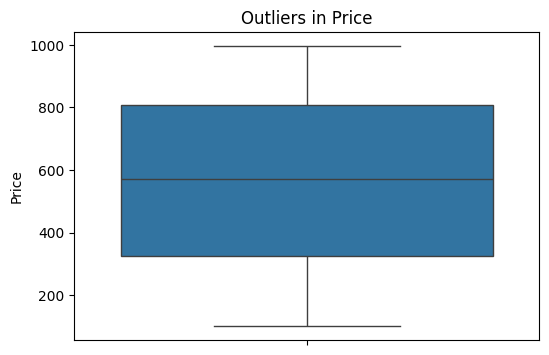

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make the plot a little bigger
plt.figure(figsize=(6, 4))

# Draw a boxplot for the Price column
sns.boxplot(y=df['Price'])

plt.title('Outliers in Price')
plt.ylabel('Price')
plt.show()


Check Outliers in Quantity

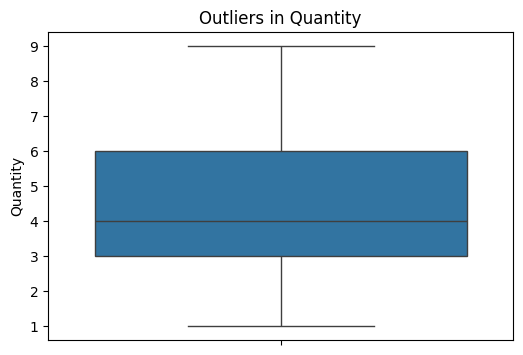

In [ ]:
# Boxplot for Quantity column
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Quantity'])

plt.title('Outliers in Quantity')
plt.ylabel('Quantity')
plt.show()


3. Check for Inconsistencies
We check if:

Categories are spelled differently (like "Electronics" vs "electroncs")

There are weird or unexpected values

Let’s look at the Category column.

In [ ]:
# Check all unique values in the Category column
df['Category'].unique()


array(['Electronics', 'Accessories', 'Gadgets'], dtype=object)

4. Feature Engineering
We’ll create a new feature called Total_Sales, which is Total_Sales = Price × Quantity

In [ ]:
# Create a new column called Total_Sales
df['Total_Sales'] = df['Price'] * df['Quantity']

# Show the first 5 rows to confirm
df.head()


,Order_ID,Product,Category,Price,Quantity,Total_Sales
1,2,Keyboard,Electronics,101.0,9.0,909.0
2,3,Tablet,Accessories,741.0,3.0,2223.0
4,5,Keyboard,Gadgets,665.0,2.0,1330.0
5,6,Phone,Gadgets,954.0,2.0,1908.0
7,8,Tablet,Electronics,324.0,6.0,1944.0


5: Scaling and Encoding

Scaling: Makes all numbers small and similar (helps models work better).

Encoding: Turns words (like categories) into numbers (so Python can use them).

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# SCALE the numeric columns
scaler = MinMaxScaler()
df[['Price', 'Quantity', 'Total_Sales']] = scaler.fit_transform(df[['Price', 'Quantity', 'Total_Sales']])

# ENCODE the Category column (text to numbers)
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

# Show the updated DataFrame
df.head()


,Order_ID,Product,Category,Price,Quantity,Total_Sales
1,2,Keyboard,1,0.000000,1.000,0.083246
2,3,Tablet,0,0.715084,0.250,0.237092
4,5,Keyboard,2,0.630168,0.125,0.132537
5,6,Phone,2,0.953073,0.125,0.200211
7,8,Tablet,1,0.249162,0.625,0.204426


**Exploratory Data Analysis (EDA)**
1. Summary Statistics

In [ ]:
# Basic statistics for numeric columns
df.describe()


,Order_ID,Category,Price,Quantity,Total_Sales
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,49.985507,1.043478,0.530079,0.449275,0.290213
std,29.186264,0.793999,0.304929,0.316023,0.240881
min,2.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.249162,0.250000,0.082192
50%,51.000000,1.000000,0.526257,0.375000,0.239082
75%,76.000000,2.000000,0.791061,0.625000,0.458728
max,99.000000,2.000000,1.000000,1.000000,1.000000


2. Visualizations

2.1 Bar Chart – Average Sales per Category

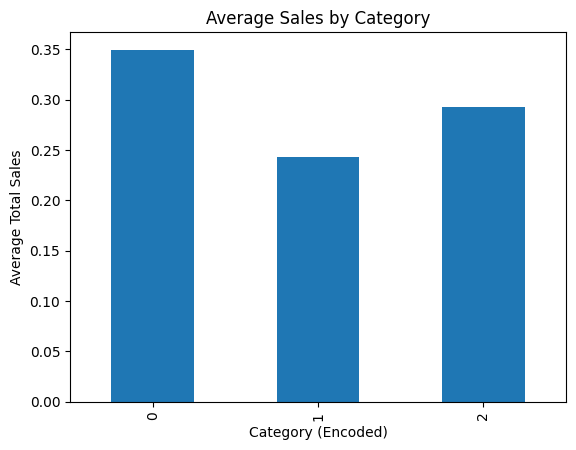

In [ ]:
# Group by Category and calculate mean Total_Sales
df.groupby('Category')['Total_Sales'].mean().plot(kind='bar')

plt.title('Average Sales by Category')
plt.xlabel('Category (Encoded)')
plt.ylabel('Average Total Sales')
plt.show()


This shows which category earns the most on average.

 2. Scatter Plot – Price vs Quantity

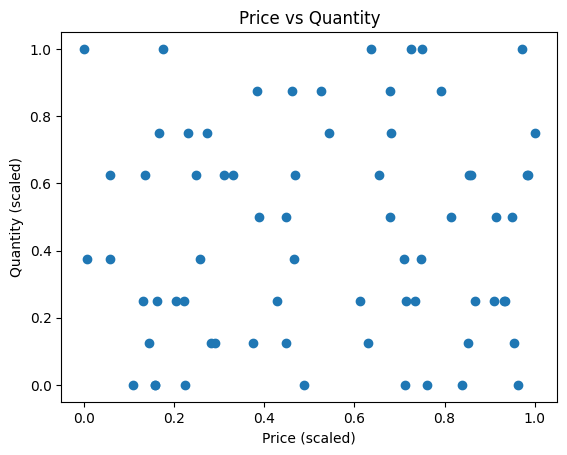

In [ ]:
plt.scatter(df['Price'], df['Quantity'])
plt.title('Price vs Quantity')
plt.xlabel('Price (scaled)')
plt.ylabel('Quantity (scaled)')
plt.show()


This helps see if cheaper items sell more.



3. Histogram – Distribution of Total Sales

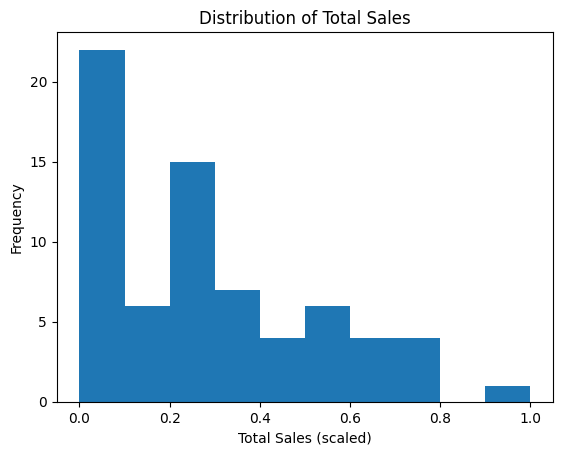

In [ ]:
df['Total_Sales'].plot(kind='hist', bins=10)

plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales (scaled)')
plt.ylabel('Frequency')
plt.show()


This shows how sales are spread across orders.

**EDA Insights:**

1. Average Sales by Category
Category 0 has the highest average sales.

This means that category (probably Accessories) performs best in revenue per order.

2. Price vs Quantity (Scatter Plot)
The points are scattered randomly → there's no strong relationship between price and how much is sold.

So, cheap products don’t always sell more — interesting!

3. Distribution of Total Sales
Most sales are low — a few orders contribute to very high revenue.

This shows a right-skewed distribution, which is common in sales data.

✅ **Final Summary of Insights**

→ Missing values were found in multiple columns and removed.

→ No major outliers were detected in either Price or Quantity.

→ A new feature called Total_Sales was created by multiplying Price × Quantity.

→ All numeric features were scaled, and the category column was encoded for analysis.

→ Bar chart showed that one category (likely Accessories) had the highest average sales.

→ Scatter plot showed no strong relationship between price and quantity.

→ Histogram showed most orders have lower sales, with a few very high-selling orders.

→ The dataset is now clean, well-prepared, and provides valuable business insights.